## Go, Johann and Uy, Beatrice 

##### This program uses the independent variables PT08.S4(NO2) to predict the absolute humidity AH of each trial. 


### 1. Import The Libraries and Dataset

In [1]:
import numpy as np #  used for working with arrays
import pandas as pd # a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns # a Python data visualization library based on matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [2]:
# To import dataset
df = pd.read_csv('AirQualityUCI.csv')

### 2. Handling Duplicates, Missing Values, and Outliers Present in the Dataset

In [3]:
#To identify and remove any duplicated rows
duplicates = df.duplicated()
df[duplicates]
df.drop_duplicates(inplace=True)
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9353  04/04/2005  11:00:00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12:00:00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13:00:00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14:00:00     2.2       1071.0    -200.0      11.9   
9357         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   
9357            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9353       1269.0  24.3  23.7  0.7119          NaN          NaN  
9354       1092.0  26.9  18.3  0.6406          NaN          NaN  
9355        770.0  28.3  13.5  0.5139          NaN          NaN  
9356        816.0  28.5  13.1  0.5028          NaN          NaN  
9357          NaN   NaN   NaN     NaN          NaN          NaN  

[9358 rows x 17 columns]

In [4]:
#only to be run on first trial
df.drop(df.tail(1).index,inplace=True)
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10:00:00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11:00:00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12:00:00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13:00:00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14:00:00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9352       1729.0  21.9  29.3  0.7568          NaN          NaN  
9353       1269.0  24.3  23.7  0.7119          NaN          NaN  
9354       1092.0  26.9  18.3  0.6406          NaN          NaN  
9355        770.0  28.3  13.5  0.5139          NaN          NaN  
9356        816.0  28.5  13.1  0.5028          NaN          NaN  

[9357 rows x 17 columns]

In [5]:
#to replace -200 values (aka missing values) with NaN
df = df[df.iloc[0:9357] != -200]
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10:00:00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11:00:00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12:00:00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13:00:00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14:00:00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9352       1729.0  21.9  29.3  0.7568          NaN          NaN  
9353       1269.0  24.3  23.7  0.7119          NaN          NaN  
9354       1092.0  26.9  18.3  0.6406          NaN          NaN  
9355        770.0  28.3  13.5  0.5139          NaN          NaN  
9356        816.0  28.5  13.1  0.5028          NaN          NaN  

[9357 rows x 17 columns]

In [6]:
df.drop(columns = ["Date", "Time", "Unnamed: 15", "Unnamed: 16"], inplace = True)
df

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0       NaN      13.5         1101.0    472.0   
9353     2.4       1163.0       NaN      11.4         1027.0    353.0   
9354     2.4       1142.0       NaN      12.4         1063.0    293.0   
9355     2.1       1003.0       NaN       9.5          961.0    235.0   
9356     2.2       1071.0       NaN      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
9352         539.0    190.0        1374.0       1729.0  21.9  29.3  0.7568  
9353         604.0    179.0        1264.0       1269.0  24.3  23.7  0.7119  
9354         603.0    175.0        1241.0       1092.0  26.9  18.3  0.6406  
9355         702.0    156.0        1041.0        770.0  28.3  13.5  0.5139  
9356         654.0    168.0        1129.0        816.0  28.5  13.1  0.5028  

[9357 rows x 13 columns]

In [7]:
# to get the column names of the datset
columns = df.columns
columns = columns.tolist()
# to retein the column names of the independent variable
x_columns = df.columns.drop(["T", "RH", "AH"])
x_columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')

In [8]:
#To drop the rows with any NaN present 
df.dropna(subset = x_columns, inplace=True)
df

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
1226     4.4       1449.0     501.0      19.5         1282.0    254.0   
1227     3.1       1363.0     234.0      15.1         1152.0    189.0   
1228     3.0       1371.0     212.0      14.6         1136.0    174.0   
1229     3.1       1406.0     275.0      13.7         1107.0    167.0   
1230     3.5       1425.0     275.0      15.2         1155.0    185.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
1226         625.0    133.0        2100.0       1569.0  19.1  61.1  1.3345  
1227         684.0    110.0        1951.0       1495.0  18.2  65.4  1.3529  
1228         689.0    102.0        1927.0       1471.0  18.1  66.1  1.3579  
1229         718.0    108.0        1872.0       1384.0  17.7  66.9  1.3422  
1230         709.0    110.0        1936.0       1789.0  17.8  66.8  1.3460  

[827 rows x 13 columns]

<AxesSubplot:>

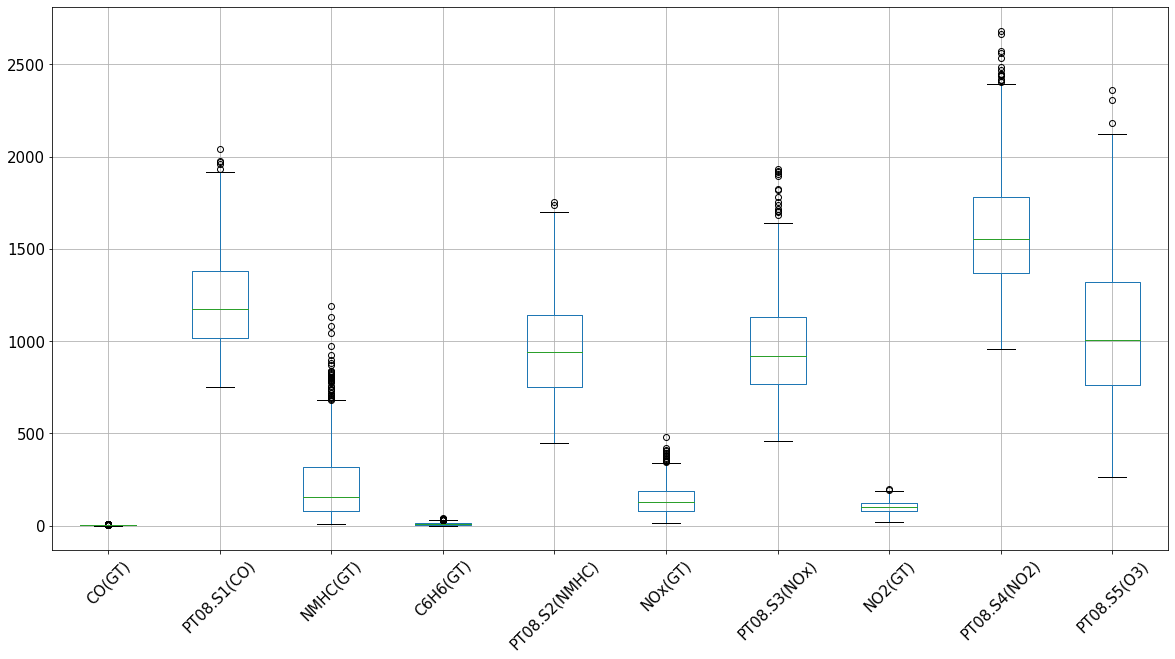

In [9]:
# to convert arrays to list
x_columns = x_columns.tolist()
# to show the boxplot
df.boxplot(column = x_columns, rot=45, fontsize = 15, grid = True, figsize = (20,10))

In [10]:
# to determine the outliers
df_outliers = pd.DataFrame(df.loc[:,])

# Calculate IQR
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

CO(GT)             1.80000
PT08.S1(CO)      363.00000
NMHC(GT)         241.50000
C6H6(GT)          10.00000
PT08.S2(NMHC)    388.50000
NOx(GT)          106.00000
PT08.S3(NOx)     362.00000
NO2(GT)           43.50000
PT08.S4(NO2)     414.00000
PT08.S5(O3)      560.00000
T                  6.40000
RH                23.85000
AH                 0.20855
dtype: float64


In [11]:
# to use IQR score to filter out the outliers by keeping only valid values

# to REPLACE every outlier on the upper side by the upper whisker 
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker_upper  = Q3 + 1.5 * IQR
    df_outliers.iloc[i,j] = whisker_upper[j]
    
# to REPLACE every outlier on the lower side by the lower whisker 
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker_lower  = Q1 - 1.5 * IQR
    df_outliers.iloc[i,j] = whisker_lower[j] #indexing
    
#we have to use the zip function to make it compatible with the for loop
#zero in the data does not mean blank
# the code can always remain the same. This can be used as a template

In [12]:
# to remove all columns
df.drop(columns =  df.loc[:,], inplace = True)

In [13]:
# to concatenate the new columns in the dataset where outliers were replaced with whisker values
df = pd.concat([df, df_outliers], axis = 1)

<AxesSubplot:>

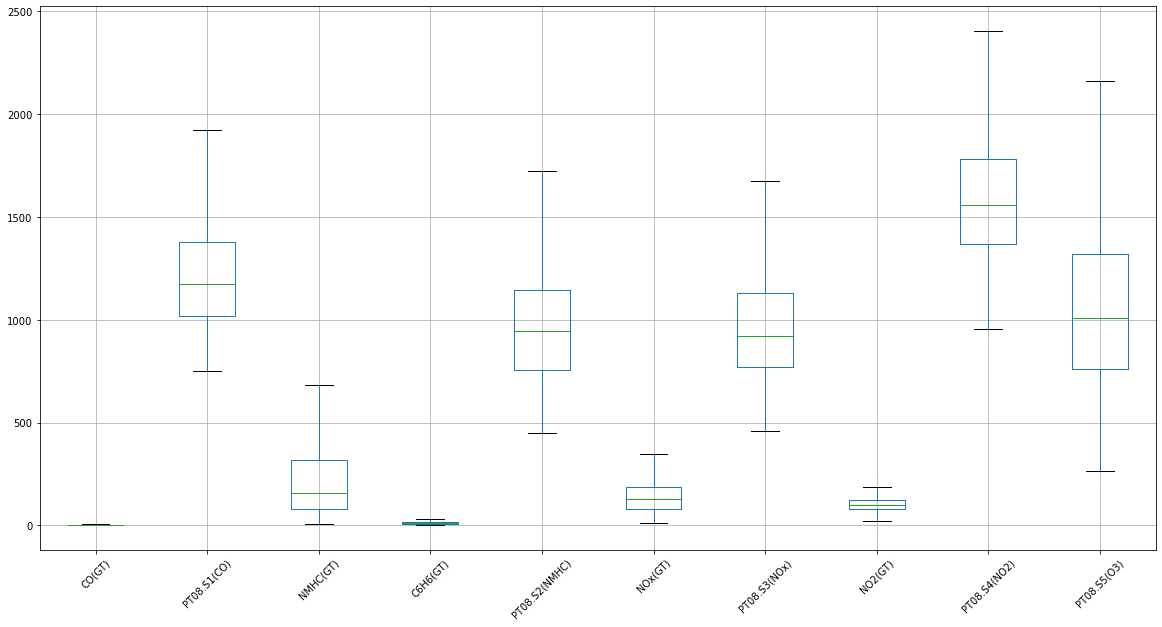

In [14]:
# to show the boxplot of the dataset where outliers were replaced with whisker values
df.boxplot(column = x_columns, rot=45, figsize = (20,10))

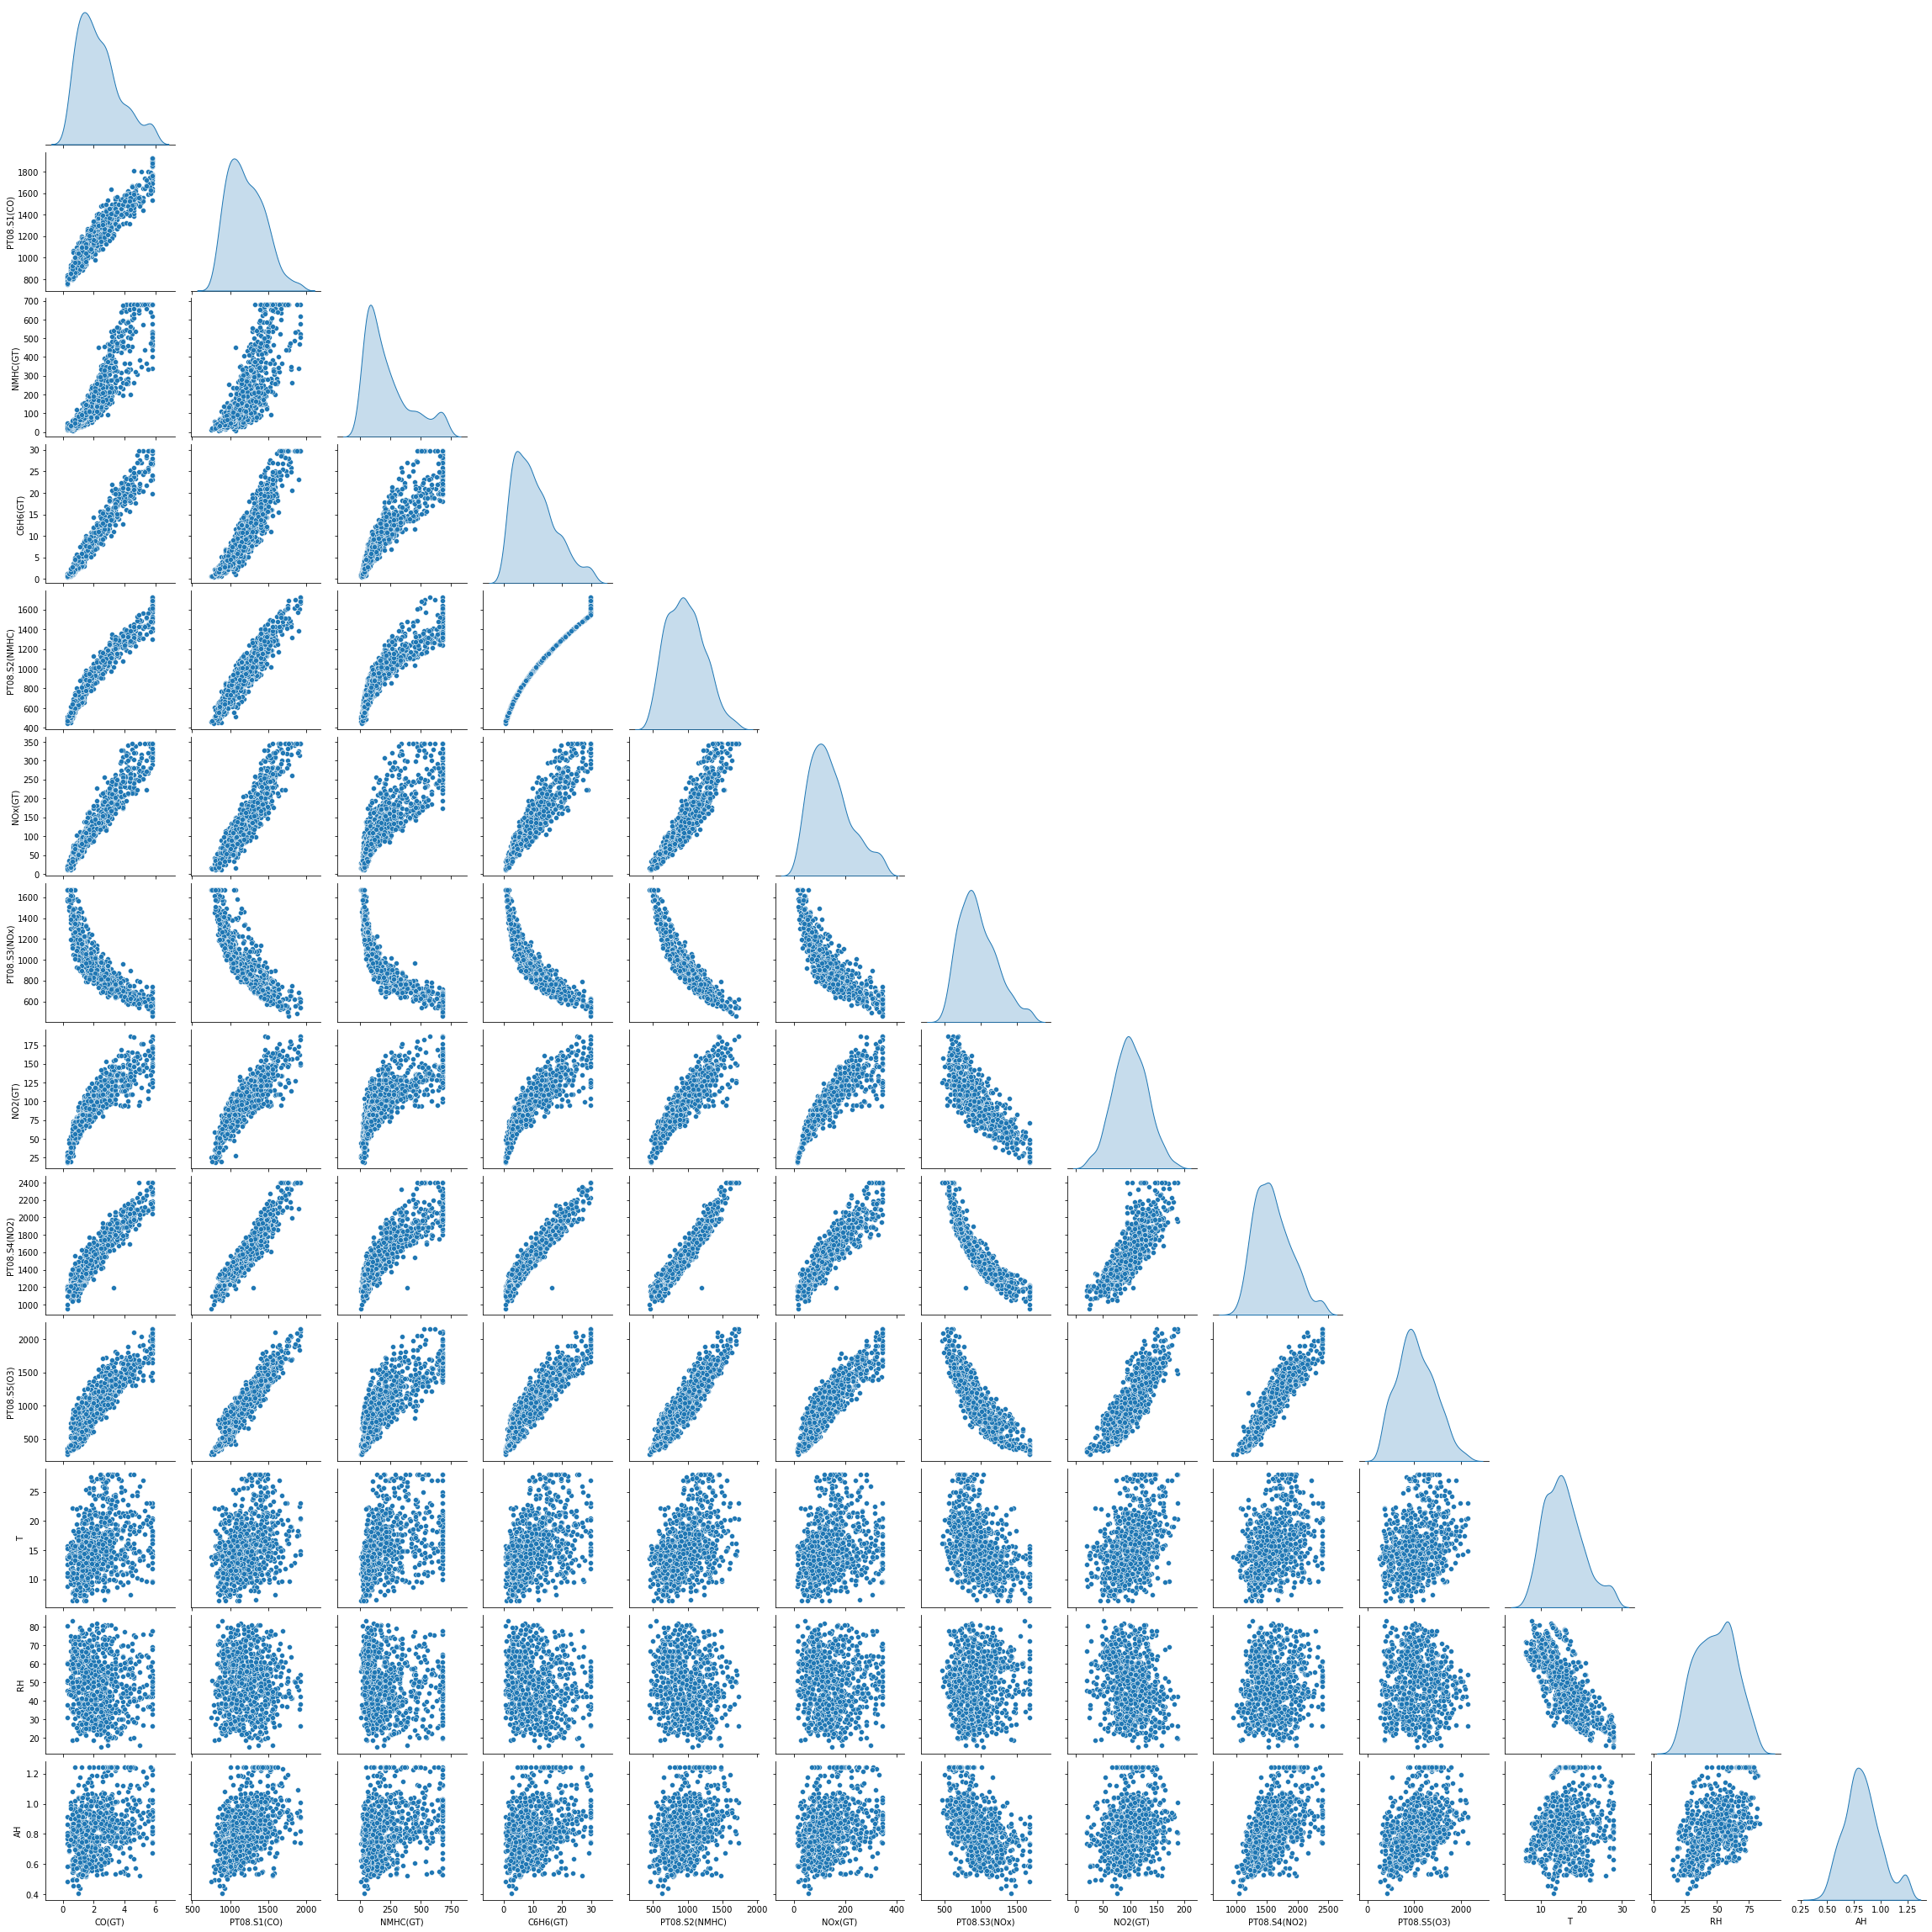

In [38]:
sns.pairplot(df, diag_kind = 'kde', corner = True);

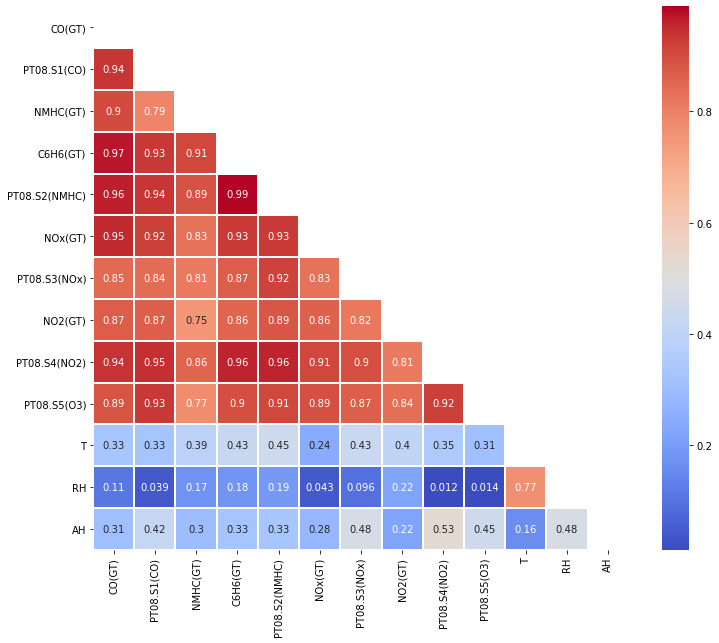

In [39]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

In [73]:
# To create the matrix of independent variable, x
# The independent variable used was NO2, while the dependent variable used was T
X = df.iloc[:,[8]].values
Y = df.iloc[:,[12]].values
#Replaces NaN cells with 0
df = df.replace(np.nan, 0)
df.iloc[:,[8]]

PT08.S4(NO2)
0           1692.0
1           1559.0
2           1555.0
3           1584.0
4           1490.0
...            ...
1226        2100.0
1227        1951.0
1228        1927.0
1229        1872.0
1230        1936.0

[827 rows x 1 columns]

### 3. Data Analysis

In [74]:
# To fit the whole dataset into a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures # this is to include polynomial terms in the model
polynomial_features = PolynomialFeatures(degree=10) # by default, degree=2
X_polynomial = polynomial_features.fit_transform(X)

In [75]:
# To fit the training dataset into a simple linear regression model
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(X_polynomial, Y)

LinearRegression()

In [76]:
# To predict the output of the whole dataset using the polynomial regression
Y_predict = pr.predict(X_polynomial)

In [77]:
# To predict the output of the whole dataset using the polynomial regression
Y_predict = pr.predict(X_polynomial)

Text(0, 0.5, 'Temperature')

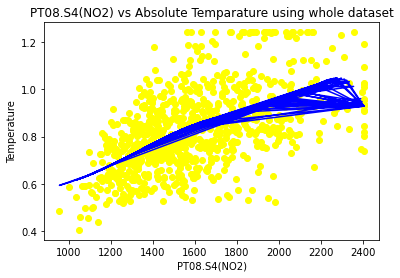

In [78]:
# To visualize the training dataset and the simple linear regression model
import matplotlib.patches as mpatches 
plt.scatter(X, Y, color = 'yellow') # for the plot of training dataset
#Y_predict_xtrain = slr.predict(X_train) # to generate the predicted data using the training dataset
plt.plot (X, Y_predict, color='blue') # for the plot of simple linear regression model
plt.title('PT08.S4(NO2) vs Absolute Temparature using whole dataset')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

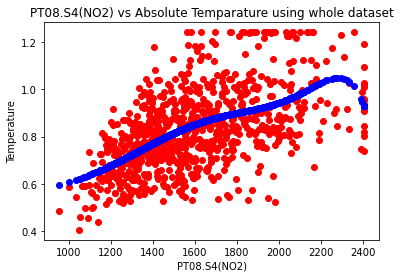

In [79]:
# To visualize the whole dataset and the polynomial regression
plt.scatter(X,Y, color='red') # for plot of the whole dataset
plt.scatter(X,Y_predict, color='blue') # for plot of the polynomial regression model
plt.title('PT08.S4(NO2) vs Absolute Temparature using whole dataset')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Temperature')

In [80]:
# To predict the salary at position level=6.5 using the polynomial regression
X_predict = [[6.5]]
X_predict_polynomial = polynomial_features.fit_transform(X_predict)
Y_predict_level = pr.predict(X_predict_polynomial)
print('Predicted absolute humidity for the NO2 Level=6.5: %.2f '
      % Y_predict_level)

Predicted absolute humidity for the NO2 Level=6.5: 0.55 


In [81]:
# To apply K-fold cross-validation for the simple linear regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
# For the Mean Absolute Error as scoring for for cross-validation 
MAE = (cross_val_score(estimator=pr, X=X, y=Y, cv=k_fold, scoring='neg_mean_absolute_error'))*-1

MAE_average = MAE.mean()
MAE_variance = MAE.std()

print('Mean Absolute Error of K-FOLDS:')
print (MAE)
print(' ')
print('Average Mean Absolute Error of K-FOLDS:')
print(MAE_average)
print(' ')
print('Mean Absolute Error Variance of K-FOLDS:')
print(MAE_variance)
print(' ')

Mean Absolute Error of K-FOLDS:
[0.1209867  0.09855423 0.11596165 0.1072741  0.11984586 0.1153113
 0.12201277 0.1215704  0.11873531 0.11530123]
 
Average Mean Absolute Error of K-FOLDS:
0.11555535602551445
 
Mean Absolute Error Variance of K-FOLDS:
0.007027132347507389
 


In [83]:
# For the Mean Squared Error as scoring for for cross-validation 
MSE = (cross_val_score(estimator=pr, X=X, y=Y, cv=k_fold, scoring='neg_mean_squared_error'))*-1

MSE_average = MSE.mean()
MSE_variance = MSE.std()

print('Mean Squared Error of K-FOLDS:')
print (MSE)
print(' ')
print('Average Mean Squared Error of K-FOLDS:')
print(MSE_average)
print(' ')
print('Mean Squared Error Variance of K-FOLDS:')
print(MSE_variance)
print(' ')

Mean Squared Error of K-FOLDS:
[0.02474876 0.01728936 0.02140867 0.0176979  0.02231967 0.01989344
 0.0227509  0.02238121 0.02165081 0.01934683]
 
Average Mean Squared Error of K-FOLDS:
0.02094875637397738
 
Mean Squared Error Variance of K-FOLDS:
0.00223523089085279
 
